In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Bupa\Bupa_AG_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6
0,85,92,45,27.0,31.0,0.0
1,85,64,59,32.0,23.0,0.0
2,86,54,33,16.0,54.0,0.0
3,91,78,34,24.0,36.0,0.0
4,98,55,13,17.0,17.0,0.0
...,...,...,...,...,...,...
340,91,54,25,22.0,35.0,4.0
341,89,48,32,22.0,14.0,4.0
342,85,52,22,23.0,34.0,4.0
343,95,93,21,27.0,47.0,6.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
int64		column 1	0
int64		column 2	0
int64		column 3	0
float64		column 4	15
float64		column 5	3
float64		column 6	0


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6
count,345.000000,345.000000,345.000000,330.000000,342.000000,345.000000
mean,90.159420,69.869565,30.405797,24.627273,38.388889,3.455072
std,4.448096,18.347670,19.512309,10.120123,39.405155,3.337835
min,65.000000,23.000000,4.000000,5.000000,5.000000,0.000000
25%,87.000000,57.000000,19.000000,19.000000,15.000000,0.500000
50%,90.000000,67.000000,26.000000,23.000000,25.000000,3.000000
75%,93.000000,80.000000,34.000000,27.000000,46.750000,6.000000
max,103.000000,138.000000,155.000000,82.000000,297.000000,20.000000


<AxesSubplot:>

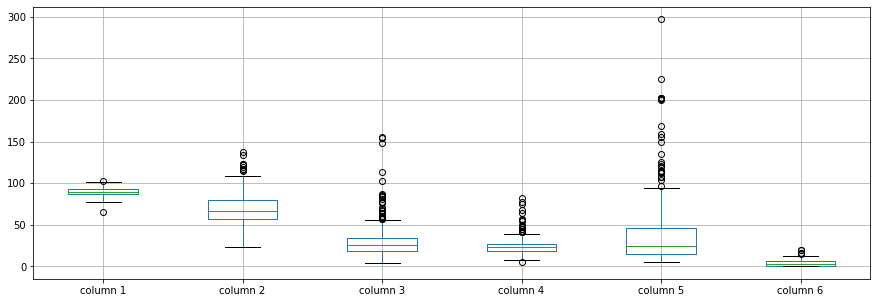

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    90.159420
column 2    69.869565
column 3    30.405797
column 4    24.627273
column 5    38.388889
column 6     3.455072
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6
column 1,1.000000,0.044103,0.147695,0.176355,0.223063,0.312680
column 2,0.044103,1.000000,0.076208,0.145241,0.132174,0.100796
column 3,0.147695,0.076208,1.000000,0.739555,0.509739,0.206848
column 4,0.176355,0.145241,0.739555,1.000000,0.523126,0.274515
column 5,0.223063,0.132174,0.509739,0.523126,1.000000,0.344476
column 6,0.312680,0.100796,0.206848,0.274515,0.344476,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [6,6+56,6+56+56,6+56+56+56,6+56+56+56+56,6+56+56+56,6+56+56,6+56,6], vae_layer = False, seed = 560)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [6]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 279.8665546235584
Epoch: 1 , loss: 280.7586975097656
Epoch: 2 , loss: 279.38334510439915
Epoch: 3 , loss: 280.6717064267113
Epoch: 4 , loss: 280.1703505743118
Epoch: 5 , loss: 279.6631724039714
Epoch: 6 , loss: 279.7133040655227
Epoch: 7 , loss: 279.42712838309154
Epoch: 8 , loss: 279.8003641764323
Epoch: 9 , loss: 279.74796912783665
Epoch: 10 , loss: 278.54001072474887
Epoch: 11 , loss: 279.982177007766
Epoch: 12 , loss: 279.4284827822731
Epoch: 13 , loss: 279.46272713797435
Epoch: 14 , loss: 277.8314376104446
Epoch: 15 , loss: 277.54004850841704
Epoch: 16 , loss: 278.4214295886812
Epoch: 17 , loss: 278.1790800548735
Epoch: 18 , loss: 277.2766273135231
Epoch: 19 , loss: 278.52568490164623
Epoch: 20 , loss: 278.0568586077009
Epoch: 21 , loss: 277.1912580217634
Epoch: 22 , loss: 277.5192573184059
Epoch: 23 , loss: 277.1051047188895
Epoch: 24 , loss: 277.7679901123047
Epoch: 25 , loss: 275.50713893345426


In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(345, 6)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    90.0
column 2    47.0
column 3    28.0
column 4    15.0
column 5    18.0
column 6     0.5
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Bupa.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6
0,0,0,0,0.0,0.0,0.0
1,0,0,0,0.0,0.0,0.0
2,0,0,0,0.0,0.0,0.0
3,0,0,0,0.0,0.0,0.0
4,0,0,0,0.0,0.0,0.0
...,...,...,...,...,...,...
340,0,0,0,0.0,0.0,0.0
341,0,0,0,0.0,0.0,0.0
342,0,0,0,0.0,0.0,0.0
343,0,0,0,0.0,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

112.08287127755352

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

2519.762091944396

In [19]:
NRMS=numerator/denominator
NRMS


0.0444815292824188

In [20]:
new_df.iloc[66,:]

column 1    86.0
column 2    54.0
column 3    20.0
column 4    21.0
column 5    16.0
column 6     2.0
Name: 66, dtype: float64

In [21]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6
0,85,92,45,27.0,31.0,0.0
1,85,64,59,32.0,23.0,0.0
2,86,54,33,16.0,54.0,0.0
3,91,78,34,24.0,36.0,0.0
4,98,55,13,17.0,17.0,0.0
...,...,...,...,...,...,...
340,91,54,25,22.0,35.0,4.0
341,89,48,32,22.0,14.0,4.0
342,85,52,22,23.0,34.0,4.0
343,95,93,21,27.0,47.0,6.0


In [22]:
imputations[-1].to_excel("Bupa_AG_1(imp).xlsx", index=False, header=False)